In [ ]:
import argparse as ap

parser = ap.ArgumentParser()

host = "http://127.0.0.1:8081"


parser.add_argument('--host', default=host, type=str, help="Default host, it runs locally change for others")

Monitored devices:
0x86ac561e351


,Datetime,Battery
0,1674033179000,86
1,1674033180000,86
2,1674033181000,86
3,1674033182000,86
4,1674033192000,86
...,...,...
68,1674033256000,87
69,1674033257000,87
70,1674033258000,87
71,1674033259000,87


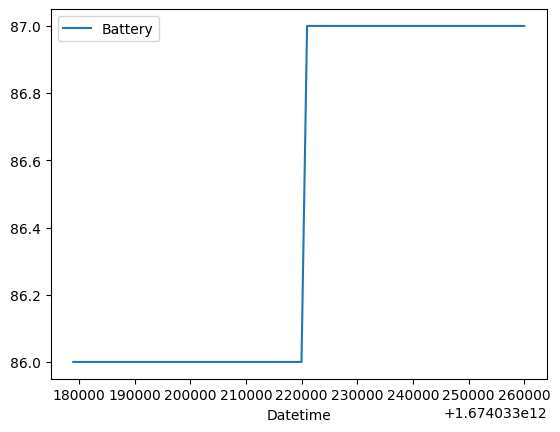

In [29]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt



# mac  = "0x38baf8d968e9"
mac_addresses = []

# A:get all macs
response = requests.get(args.host+"/devices")
if response.status_code == 200:
    objs=response.json()['mac_addresses']
    print("Monitored devices:")
    print(obj)
    for obj in objs:
        mac_addresses.append(obj)
      
    
else:
    print("The server is offline")
    exit()


# B: get dataframe for given mac and time

for mac_address in mac_addresses:
    request_path = args.host+"/device/"+ mac_address + "?fromtime=1673470855000&totime=1674248455000"
    response = requests.get(request_path)
    mac_address_details_in_string = str(response.content.decode())
    mac_address_details_in_json = json.loads(mac_address_details_in_string)

    mac_address   = mac_address_details_in_json["mac_address"]
    mac_address_x = mac_address_details_in_json["timestamps"]
    mac_address_b = mac_address_details_in_json["battery_levels"]
    mac_address_p = mac_address_details_in_json["power_plugged"]
    
    dictio = {"Datetime": mac_address_x, "Battery":mac_address_b}
    

    df_battery = pd.DataFrame(dictio, columns=['Datetime', 'Battery'])
    df_battery = df_battery.astype({"Datetime": int, "Battery": int})
    #print(df_battery)
    display(df_battery)
    import matplotlib.pyplot as plt
    df_battery.plot(x='Datetime', y='Battery')#, kind='scatter') #'Datetime', 'Battery'
    plt.show()



In [25]:
mac_Address_to_be_deleted = mac_addresses.pop()
print("Deleting : "+mac_Address_to_be_deleted)
#return mac_address_to_monitor
response = requests.delete(host+"/device/{}".format(mac_Address_to_be_deleted))
print(response)

IndexError: pop from empty list

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a2753a10-9edf-450b-a239-e31831f0d1d7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>